# Capstone Project - The Battle of Neighborhoods

#### Introduction

Japan's parliament has approved a controversial new law allowing hundreds of thousands of foreigners into the country to ease labour shortages.
From April 2019 onwards, foreigners have been allowed to take up jobs in sectors such construction, farming and nursing.
Japan has traditionally been wary of immigration but the government says more foreigners are needed because of Japan's ageing population.Under the new system, more than 300,000 foreigners could be allowed to work in sectors facing a labour crunch.
Japan has a rich cultural heritage when it comes to art, technology and also food. Let us analyse the data to find out about the Ramen restaurants in Japan, Ramen being a very popular food item amongst Japanese as well as non-Japanese people.


#### Data
Picked up list of cities in Japan from  - https://en.wikipedia.org/wiki/List_of_cities_in_Japan

Picked up the Geospatial data of the top 9 populated cities from - https://www.latlong.net/category/cities-111-15.html

#### Target Audience
Restaurant owners who want to decide on if they should add more Ramen outlets, keeping in mind the projected increase in demand
Apart from setting up new Restaurants, this data can also help existing restaurant owners understand the customer ratings and feedback and help them take corrective measures

#### Steps to follow

1.	Picked up data from Wikipedia to get the list of cities in Japan
2.	Picked the data for longitude and latitude for the 9 most populated cities in Japan
3.	Using Foursquare, identified the venues in these 9 cities
4.	Plotted the bar graph for the count of Ramen restaurants in the above 9 cities
5.	Explored the venues and identified the topmost ratings and likes
6.	Plot the trending venue in Tokyo


In [28]:
import pandas as pd

In [29]:
import urllib.request

url = 'https://en.wikipedia.org/wiki/List_of_cities_in_Japan'
req = urllib.request.urlopen(url)
article = req.read().decode()

with open('List_of_cities_in_Japan.html', 'w') as fo:
    fo.write(article)

In [30]:
from bs4 import BeautifulSoup

article = open('List_of_cities_in_Japan.html').read()
soup = BeautifulSoup(article, 'html.parser')
tables = soup.find_all('table', class_='sortable')

for table in tables:
    ths = table.find_all('th')
    headings = [th.text.strip() for th in ths]
    if headings[:8] == ['City (Special Ward)', 'Japanese', 'Prefecture', 'Population','Area','Density','Founded','Homepage']:
        break

with open('cities_in_japan.txt', 'w') as fo:
    for tr in table.find_all('tr'):
        tds = tr.find_all('td')
        if not tds:
            continue
        col1, col2, col3, col4, col5, col6, col7, col8 = [td.text.strip() for td in tds[:8]]        
        
        print(';'.join([col1, col2, col3, col4, col5, col6, col7, col8]), file=fo)
        
data = pd.read_csv('cities_in_japan.txt', sep=";",header=None)
data.columns = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8']
data = data.drop(columns=['col2','col6','col7','col8'])
data.columns=['City','Prefecture','Population','Area']         
data.head(10)



,City,Prefecture,Population,Area
0,Nagoya,Aichi,"2,283,289",326.45
1,Toyohashi,Aichi,"377,045",261.35
2,Okazaki,Aichi,"371,380",387.24
3,Ichinomiya,Aichi,"375,939",113.91
4,Seto,Aichi,"132,311",111.61
5,Handa,Aichi,"117,927",47.24
6,Kasugai,Aichi,"300,713",92.71
7,Toyokawa,Aichi,"161,595",150.71
8,Tsushima,Aichi,"65,646",25.08
9,Hekinan,Aichi,"73,024",35.86


In [31]:
data = data.apply(lambda x: x.str.replace(',',''))
data.dtypes

City          object
Prefecture    object
Population    object
Area          object
dtype: object

In [32]:
data = data.astype({"Population": int, "Area": float})

In [33]:
data = data.sort_values(by='Population', ascending=False)
dataset = data.head(9)
dataset



,City,Prefecture,Population,Area
730,Tokyo Ward AASpecial wards of Tokyo,Tokyo,8637098,621.81
355,Yokohama,Kanagawa,3697894,437.38
555,Osaka,Osaka,2668586,222.30
0,Nagoya,Aichi,2283289,326.45
207,Sapporo,Hokkaidō,1918096,1710.00
118,Fukuoka,Fukuoka,1581527,340.96
242,Kobe,Hyōgo,1530847,552.23
399,Kyoto,Kyoto,1474570,827.90
357,Kawasaki,Kanagawa,1373630,142.70


In [34]:
dataset.insert(4, "Latitude", [35.652832, 35.443707, 34.669529, 35.183334,43.066666,33.583332,34.689999,35.011665,35.516666 ], True) 


In [35]:
dataset.insert(5,"Longitude", [139.839478,139.638031,135.497009,136.899994,141.350006,130.399994,135.195557,135.768326,139.699997], True)

In [36]:
dataset

,City,Prefecture,Population,Area,Latitude,Longitude
730,Tokyo Ward AASpecial wards of Tokyo,Tokyo,8637098,621.81,35.652832,139.839478
355,Yokohama,Kanagawa,3697894,437.38,35.443707,139.638031
555,Osaka,Osaka,2668586,222.30,34.669529,135.497009
0,Nagoya,Aichi,2283289,326.45,35.183334,136.899994
207,Sapporo,Hokkaidō,1918096,1710.00,43.066666,141.350006
118,Fukuoka,Fukuoka,1581527,340.96,33.583332,130.399994
242,Kobe,Hyōgo,1530847,552.23,34.689999,135.195557
399,Kyoto,Kyoto,1474570,827.90,35.011665,135.768326
357,Kawasaki,Kanagawa,1373630,142.70,35.516666,139.699997


In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [59]:
CLIENT_ID = 'QA1PWBYB3PDBKIOUBTQQDT0WBIWH4TFJ2REJOZYUYKCIB5ND' # your Foursquare ID
CLIENT_SECRET = 'SSUS1OCYF3PTFY5TFIC1JDE3OBKBRFPBQB2WUM44PIEQZZ1B' # your Foursquare Secret
VERSION = '20190809' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
RADIUS=1200
LIMIT=100

Your credentails:
CLIENT_ID: QA1PWBYB3PDBKIOUBTQQDT0WBIWH4TFJ2REJOZYUYKCIB5ND
CLIENT_SECRET:SSUS1OCYF3PTFY5TFIC1JDE3OBKBRFPBQB2WUM44PIEQZZ1B


In [60]:
def fetch_venues(lat,long):   
   
    #url to explore venues
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            long, 
            RADIUS, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [61]:
def fetch_venue_details(venue_id):      
    #fetch venues url
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df    

In [72]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [62]:
column_names=['Prefecture', 'City', 'ID','Name']
resto_list=pd.DataFrame(columns=column_names)

for row in dataset.values.tolist():
    city, pref, pop, area, Latitude, Longitude=row
    venues = fetch_venues(Latitude,Longitude)
    restaurants=venues[venues['Category']=='Ramen Restaurant']   
    print(len(restaurants),'Ramen Restaurant(s) in '+city)
    for restaurant in restaurants.values.tolist():
        id, name , category=restaurant
        resto_list = resto_list.append({'Prefecture': pref,
                                                'City': city, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    
    
resto_list

0 Ramen Restaurant(s) in Tokyo Ward AASpecial wards of Tokyo
7 Ramen Restaurant(s) in Yokohama
4 Ramen Restaurant(s) in Osaka
2 Ramen Restaurant(s) in Nagoya
5 Ramen Restaurant(s) in Sapporo
6 Ramen Restaurant(s) in Fukuoka
3 Ramen Restaurant(s) in Kobe
5 Ramen Restaurant(s) in Kyoto
6 Ramen Restaurant(s) in Kawasaki


,Prefecture,City,ID,Name
0,Kanagawa,Yokohama,4b7cd69af964a52010a72fe3,Tenkaippin (天下一品)
1,Kanagawa,Yokohama,4b6d3c91f964a520e66c2ce3,Yousyu-Syonin (揚州商人)
2,Kanagawa,Yokohama,4b496456f964a520f16e26e3,Ramen Jiro (ラーメン二郎 横浜関内店)
3,Kanagawa,Yokohama,58e709d73ef0f614ce44072d,中華蕎麦 時雨
4,Kanagawa,Yokohama,51b12755abd89a0e082663f7,Hechikan (丿貫)
5,Kanagawa,Yokohama,5438108a498e00613171318a,Hoshino Chukasoba Ramen (地球の中華そば)
6,Kanagawa,Yokohama,4d0c3326bdbfa35d75506272,北海道ラーメン来々軒 本店
7,Osaka,Osaka,4c2d50a8987f20a12d5749aa,つけ麺 雀
8,Osaka,Osaka,4b6186bbf964a520d9162ae3,Ichiran (一蘭 道頓堀店本館)
9,Osaka,Osaka,552fca5e498e14c3cc433e6f,Ichiran (一蘭 道頓堀店別館)


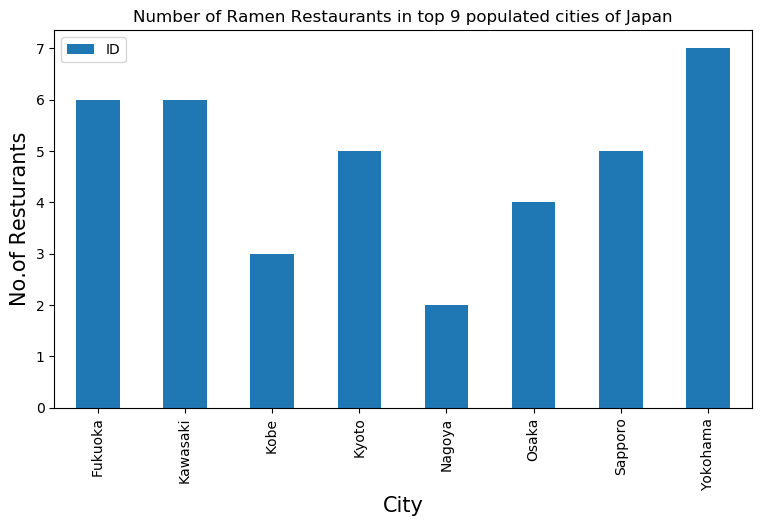

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Ramen Restaurants in top 9 populated cities of Japan')
#On x-axis
plt.xlabel('City', fontsize = 15)
#On y-axis
plt.ylabel('No.of Resturants', fontsize=15)
#giving a bar plot
resto_list.groupby('City')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [83]:
column_names=['Prefecture', 'City', 'ID','Name','Likes','Rating','Tips']
resto_stats=pd.DataFrame(columns=column_names)
for row in resto_list.values.tolist():
    pref,city,ID,Name=row
    try:
        venue_info=fetch_venue_details(ID)
        venue_info
        id,name,likes,rating,tips=venue_info.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)       
        id,name,likes,rating,tips=[0]*5
    
    resto_stats = resto_stats.append({'Prefecture': pref,
                                                'City': city, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
resto_stats

KeyError: 'venue'

In [65]:
resto_stats.dtypes

Prefecture     object
City           object
ID             object
Name           object
Likes          object
Rating        float64
Tips           object
dtype: object

In [66]:
#convert likes and tips to int
resto_stats['Tips']=resto_stats['Tips'].astype('float64')
resto_stats['Likes']=resto_stats['Likes'].astype('float64')

In [67]:
#Restaurant with max likes
resto_stats.iloc[resto_stats['Likes'].idxmax()]

Prefecture                       Osaka
City                             Osaka
ID            552fca5e498e14c3cc433e6f
Name               Ichiran (一蘭 道頓堀店別館)
Likes                              326
Rating                             8.6
Tips                                86
Name: 9, dtype: object

In [69]:
#Restaurant with highest rating
resto_stats.iloc[resto_stats['Rating'].idxmax()]

Prefecture                     Kanagawa
City                           Yokohama
ID             4b496456f964a520f16e26e3
Name          Ramen Jiro (ラーメン二郎 横浜関内店)
Likes                               200
Rating                                9
Tips                                 35
Name: 2, dtype: object

In [89]:
#Average Rating of all Restaurants
resto_stats['Rating'].mean()

8.35

### Explore Trending Venues

In [70]:
# define URL
t_lat = 35.652832
t_long = 139.839478
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, t_lat, t_long, VERSION)

# send GET request and get trending venues
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d4d3342531593002cff30e3'},
 'response': {'venues': [{'id': '4b4162b1f964a52016c625e3',
    'name': 'Shin-Kiba Station (新木場駅)',
    'location': {'address': '新木場1',
     'lat': 35.64602,
     'lng': 139.82663,
     'labeledLatLngs': [{'label': 'display',
       'lat': 35.64602,
       'lng': 139.82663}],
     'distance': 1387,
     'postalCode': '136-0082',
     'cc': 'JP',
     'city': '江東区',
     'state': '東京都',
     'country': '日本',
     'formattedAddress': ['新木場1', '江東区, 東京都', '136-0082', '日本']},
    'categories': [{'id': '4bf58dd8d48988d129951735',
      'name': 'Train Station',
      'pluralName': 'Train Stations',
      'shortName': 'Train Station',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/trainstation_',
       'suffix': '.png'},
      'primary': True}]}]}}

In [74]:
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [75]:
trending_venues_df

,name,categories,location.distance,location.city,location.postalCode,location.state,location.country,location.lat,location.lng
0,Shin-Kiba Station (新木場駅),Train Station,1387,江東区,136-0082,東京都,日本,35.64602,139.82663


In [86]:
if len(results['response']['venues']) == 0:
    venues_map = 'Cannot generate visual as no trending venues are available at the moment!'

else:
    venues_map = folium.Map(location=[t_lat, t_long], zoom_start=15) # generate map centred around Tokyo


    # add Ecco as a red circle mark
    folium.features.CircleMarker(
        [t_lat, t_long],
        radius=10,
        popup='Tokyo',
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)


    # add the trending venues as blue circle markers
    for lat, lng, label in zip(trending_venues_df['location.lat'], trending_venues_df['location.lng'], trending_venues_df['name']):
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            poup=label,
            fill=True,
            color='blue',
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map)

In [87]:
venues_map